In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('/home/timur/work_hub/ml_zoomcamp2023/2. Machine Learning for Regression/data.csv')

In [3]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# 2.1 Data preparation


Look at missing values

In [4]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

We see that our columns have different upper and lower cases, and sometimes spaces. We have to standartize our columns, create lower cases and underscores instead of spaces

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

Let's standartize out values as well. We can do it only with object dtypes

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
df.dtypes[df.dtypes == object]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

dsadas

In [9]:
strings = list(df.dtypes[df.dtypes == object].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings: 
    df[col] = df[col].str.lower().str.replace(' ','_')

Now we can see that our data a bit cleaner

In [11]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# 2.2 Exploratory data analysis 

In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

Let's look closer to our data, check some statistic

In [13]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [14]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution price (MSPR column)

In [16]:
import matplotlib.pyplot as pls 
import seaborn as sns 

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

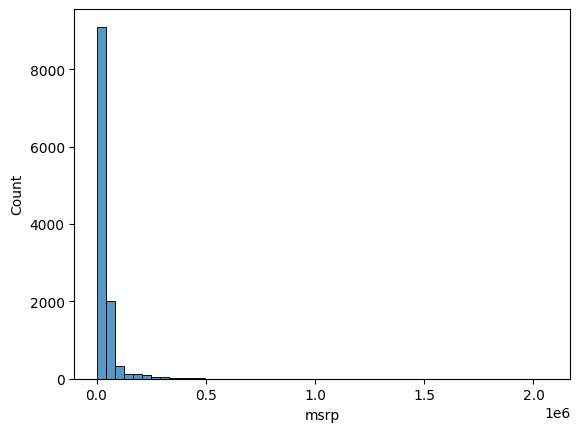

In [17]:
sns.histplot(df.msrp, bins = 50)

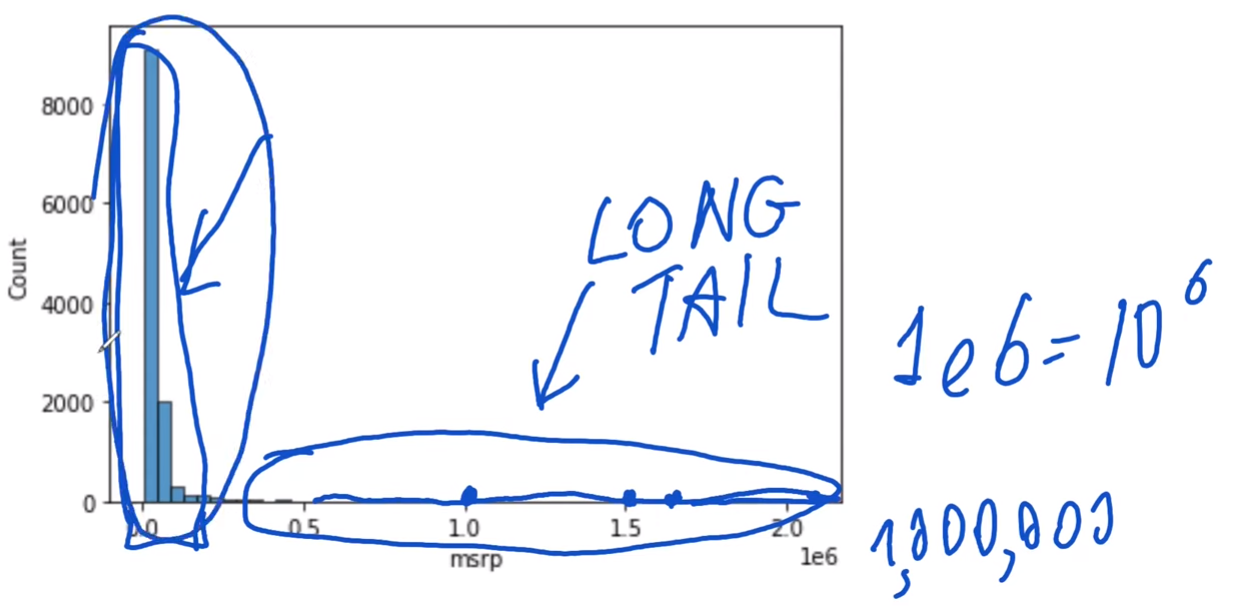

Zoom in

<Axes: xlabel='msrp', ylabel='Count'>

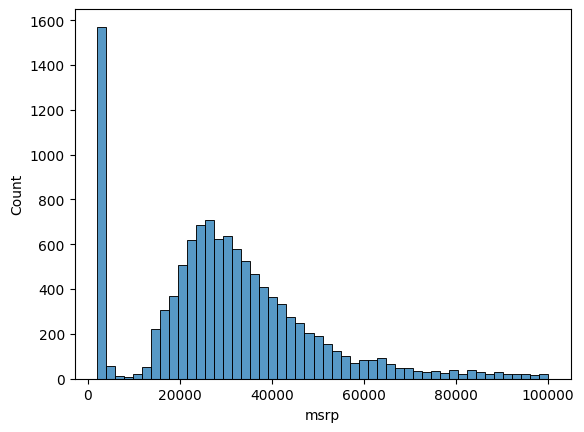

In [18]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

This kind of distribution not good for ML.So because of that we have to log our distribution. This makes the distribution closer to normal and improves the performance of models that are sensitive to the scale of the data.

We also can use best practice and add 1 to our values to make sure that we don't have 0 values. The problems is that log(0) doesn't exist we will get a error in this situation. We can do it by using -  **np.log1**

In [19]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

Let's see on our new log distribution

<Axes: xlabel='msrp', ylabel='Count'>

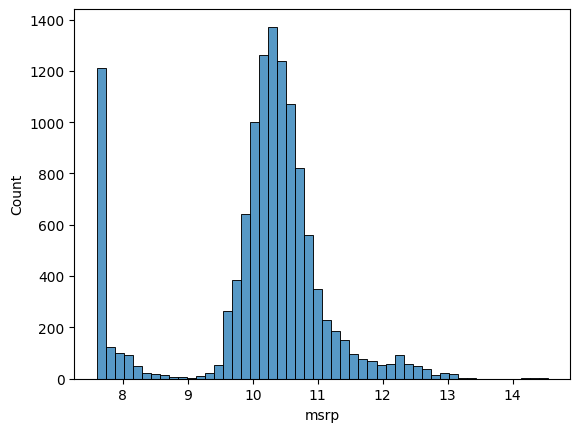

In [20]:
sns.histplot(price_logs, bins = 50)

We see that our tail has gone and also our distribution resemble us **normal distribution**. So we can work with this type of distribution and apply our model

## 2.3 Setting up the validation framework

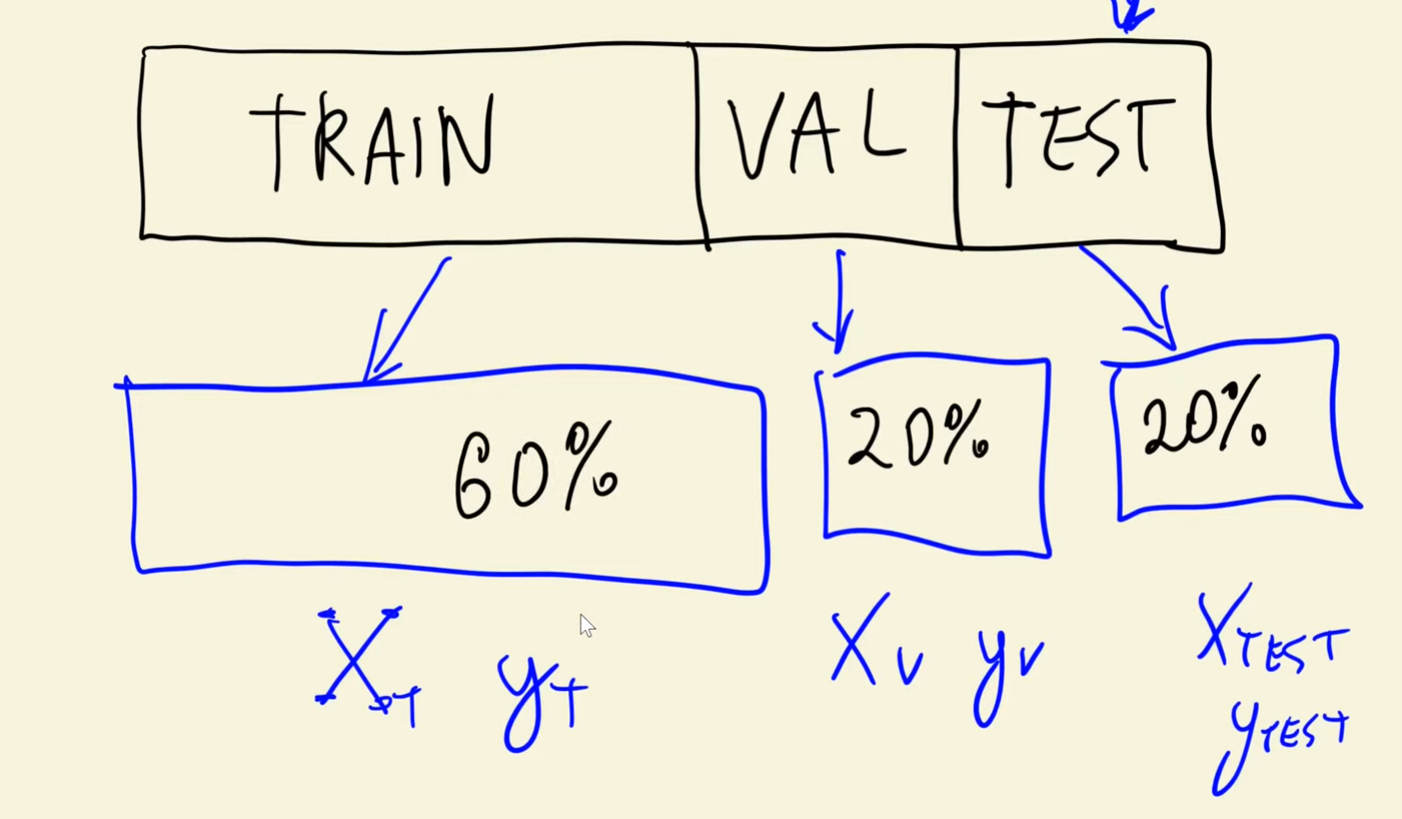

In [21]:
n = len(df)

n_val = int(n * 0.2) 
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_val+n_test+n_train)

11914 11914


In [22]:
n_val, n_test, n_train

(2382, 2382, 7150)

Let's split our dataframe using **iloc** method

In [23]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [24]:
df_val

make       model  year             engine_fuel_type  engine_hp  \
0         bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1         bmw    1_series  2011  premium_unleaded_(required)      300.0   
2         bmw    1_series  2011  premium_unleaded_(required)      300.0   
3         bmw    1_series  2011  premium_unleaded_(required)      230.0   
4         bmw    1_series  2011  premium_unleaded_(required)      230.0   
...       ...         ...   ...                          ...        ...   
2377  porsche     cayenne  2016  premium_unleaded_(required)      570.0   
2378  porsche     cayenne  2016                       diesel      240.0   
2379  porsche     cayenne  2017  premium_unleaded_(required)      520.0   
2380  porsche     cayenne  2017  premium_unleaded_(required)      300.0   
2381  porsche     cayenne  2017  premium_unleaded_(required)      440.0   

      engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0                  6.0            manual  rear_wheel_drive              2.0   
1                  6.0            manual  rear_wheel_drive              2.0   
2                  6.0            manual  rear_wheel_drive              2.0   
3                  6.0            manual  rear_wheel_drive              2.0   
4                  6.0            manual  rear_wheel_drive              2.0   
...                ...               ...               ...              ...   
2377               8.0         automatic   all_wheel_drive              4.0   
2378               6.0         automatic   all_wheel_drive              4.0   
2379               8.0         automatic   all_wheel_drive              4.0   
2380               6.0         automatic   all_wheel_drive              4.0   
2381               6.0         automatic   all_wheel_drive              4.0   

                            market_category vehicle_size vehicle_style  \
0     factory_tuner,luxury,high-performance      compact         coupe   
1                        luxury,performance      compact   convertible   
2                   luxury,high-performance      compact         coupe   
3                        luxury,performance      compact         coupe   
4                                    luxury      compact   convertible   
...                                     ...          ...           ...   
2377      crossover,luxury,high-performance      midsize       4dr_suv   
2378                crossover,luxury,diesel      midsize       4dr_suv   
2379           crossover,luxury,performance      midsize       4dr_suv   
2380                       crossover,luxury      midsize       4dr_suv   
2381      crossover,luxury,high-performance      midsize       4dr_suv   

      highway_mpg  city_mpg  popularity    msrp  
0              26        19        3916   46135  
1              28        19        3916   40650  
2              28        20        3916   36350  
3              28        18        3916   29450  
4              28        18        3916   34500  
...           ...       ...         ...     ...  
2377           21        14        1715  157300  
2378           29        20        1715   62300  
2379           21        14        1715  116500  
2380           24        18        1715   59600  
2381           23        16        1715   97200  

[2382 rows x 16 columns]

In [25]:
df_train

make   model  year                engine_fuel_type  engine_hp  \
4764      ford    flex  2016                regular_unleaded      287.0   
4765      ford    flex  2017  premium_unleaded_(recommended)      365.0   
4766      ford    flex  2017                regular_unleaded      287.0   
4767      ford    flex  2017                regular_unleaded      287.0   
4768      ford    flex  2017                regular_unleaded      287.0   
...        ...     ...   ...                             ...        ...   
11909    acura     zdx  2012     premium_unleaded_(required)      300.0   
11910    acura     zdx  2012     premium_unleaded_(required)      300.0   
11911    acura     zdx  2012     premium_unleaded_(required)      300.0   
11912    acura     zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln  zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
4764                6.0         automatic  front_wheel_drive              4.0   
4765                6.0         automatic    all_wheel_drive              4.0   
4766                6.0         automatic    all_wheel_drive              4.0   
4767                6.0         automatic  front_wheel_drive              4.0   
4768                6.0         automatic  front_wheel_drive              4.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                  market_category vehicle_size  vehicle_style  highway_mpg  \
4764        crossover,performance        large          wagon           23   
4765                    crossover        large          wagon           21   
4766        crossover,performance        large          wagon           22   
4767        crossover,performance        large          wagon           23   
4768        crossover,performance        large          wagon           23   
...                           ...          ...            ...          ...   
11909  crossover,hatchback,luxury      midsize  4dr_hatchback           23   
11910  crossover,hatchback,luxury      midsize  4dr_hatchback           23   
11911  crossover,hatchback,luxury      midsize  4dr_hatchback           23   
11912  crossover,hatchback,luxury      midsize  4dr_hatchback           23   
11913                      luxury      midsize          sedan           26   

       city_mpg  popularity   msrp  
4764         16        5657  37800  
4765         15        5657  43030  
4766         16        5657  40180  
4767         16        5657  32730  
4768         16        5657  38230  
...         ...         ...    ...  
11909        16         204  46120  
11910        16         204  56670  
11911        16         204  50620  
11912        16         204  50920  
11913        17          61  28995  

[7150 rows x 16 columns]

At first glance it seems like OK, task has done, we successfully split our dataset. But here's the problem. Our data quite ordered so there are some records (for example about BMW model in df_val) that doesn't appear in df_train. That's the problem because our model will be train on data that doesn't exist in validata dataset.

**So we need to shuffle our data**

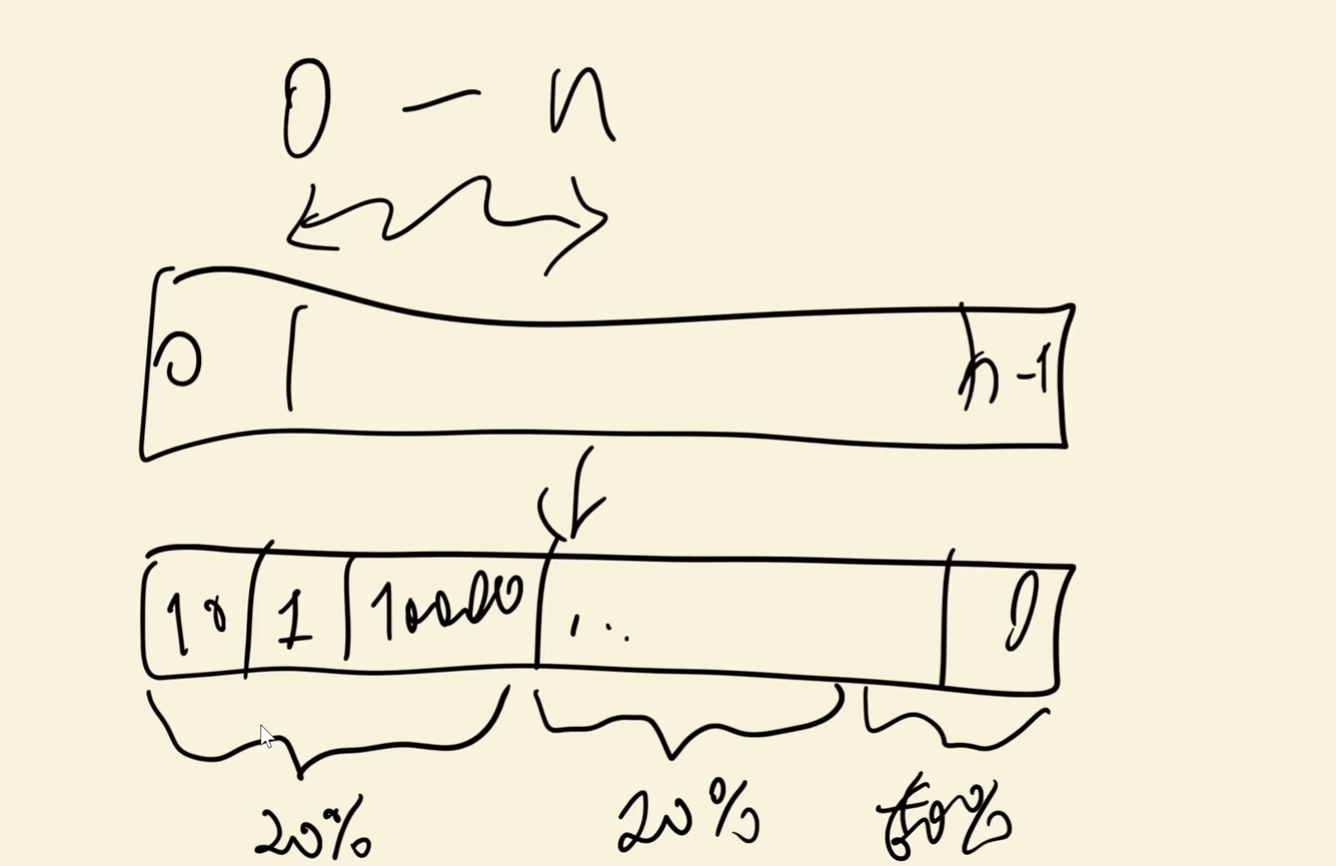

In [26]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

Lets create array from len of our dataset

In [27]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

Let's shuffle it

In [28]:
np.random.seed(5)
np.random.shuffle(idx)

In [29]:
idx

array([3863, 7113,  917, ..., 4079, 2254, 2915])

Apply it to our datasets

In [30]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [31]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [32]:
df_train.head()

make          model  year                engine_fuel_type  engine_hp  \
3863  hyundai        elantra  2016                regular_unleaded      173.0   
7113    mazda     mx-5_miata  2015  premium_unleaded_(recommended)      167.0   
917      audi             90  1995                regular_unleaded      172.0   
3833  hyundai  elantra_coupe  2013                regular_unleaded      145.0   
1312   suzuki          aerio  2005                regular_unleaded      155.0   

      engine_cylinders transmission_type      driven_wheels  number_of_doors  \
3863               4.0         automatic  front_wheel_drive              4.0   
7113               4.0            manual   rear_wheel_drive              2.0   
917                6.0            manual    all_wheel_drive              4.0   
3833               4.0         automatic  front_wheel_drive              2.0   
1312               4.0         automatic  front_wheel_drive              4.0   

     market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
3863     performance      compact         sedan           35        24   
7113     performance      compact   convertible           28        22   
917           luxury      compact         sedan           23        17   
3833             NaN      compact         coupe           37        27   
1312             NaN      compact         sedan           28        22   

      popularity   msrp  
3863        1439  21250  
7113         586  23970  
917         3105   2000  
3833        1439  20895  
1312         481  14349

Set indexes and reassign our datasets

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
df_train.head()

make          model  year                engine_fuel_type  engine_hp  \
0  hyundai        elantra  2016                regular_unleaded      173.0   
1    mazda     mx-5_miata  2015  premium_unleaded_(recommended)      167.0   
2     audi             90  1995                regular_unleaded      172.0   
3  hyundai  elantra_coupe  2013                regular_unleaded      145.0   
4   suzuki          aerio  2005                regular_unleaded      155.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0         automatic  front_wheel_drive              4.0   
1               4.0            manual   rear_wheel_drive              2.0   
2               6.0            manual    all_wheel_drive              4.0   
3               4.0         automatic  front_wheel_drive              2.0   
4               4.0         automatic  front_wheel_drive              4.0   

  market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
0     performance      compact         sedan           35        24   
1     performance      compact   convertible           28        22   
2          luxury      compact         sedan           23        17   
3             NaN      compact         coupe           37        27   
4             NaN      compact         sedan           28        22   

   popularity   msrp  
0        1439  21250  
1         586  23970  
2        3105   2000  
3        1439  20895  
4         481  14349

Then we need to do something with our **y** (target - price). Actually like I said early we can use log transformation. And then get NumPy instead of Series datatypes.

In [35]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

We assign our log transform msrp column value to y_train, y_val, y_test. So we have to delete msrp column from df_train, df_val, df_test because we can accidentally use it in future

In [36]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [37]:
len(y_train)

7150

## 2.4 Linear regression

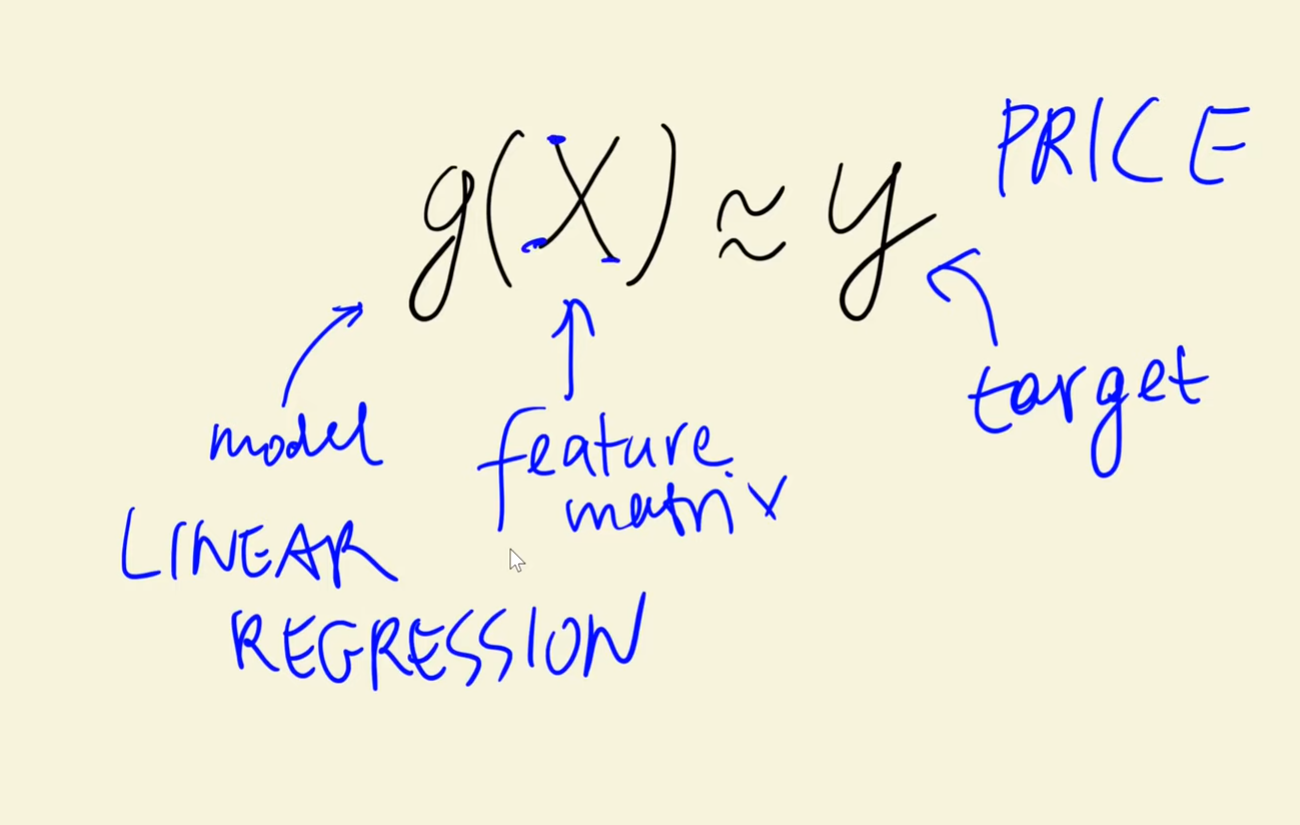

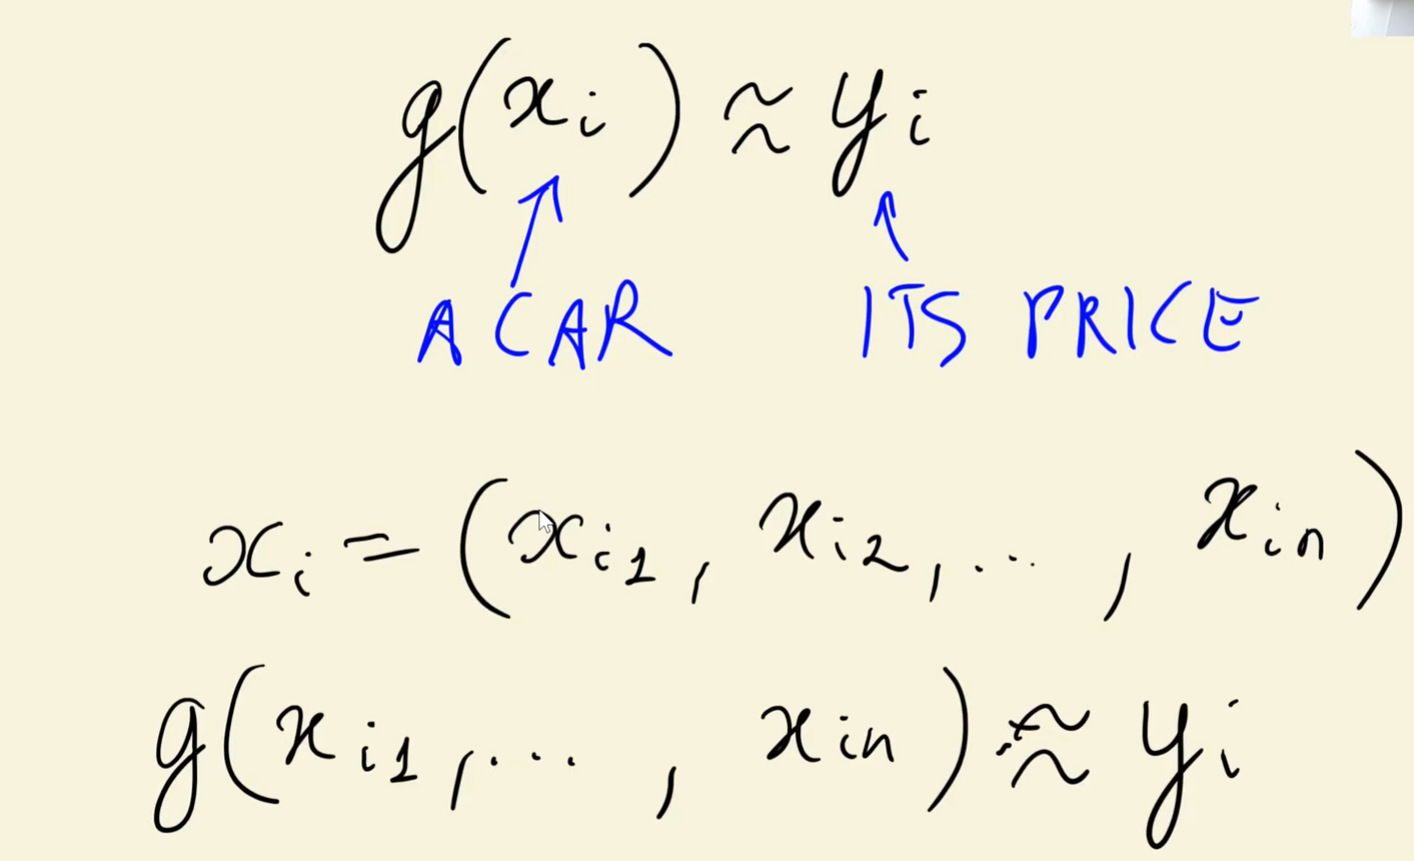

In [38]:
df_train

make          model  year                engine_fuel_type  \
0        hyundai        elantra  2016                regular_unleaded   
1          mazda     mx-5_miata  2015  premium_unleaded_(recommended)   
2           audi             90  1995                regular_unleaded   
3        hyundai  elantra_coupe  2013                regular_unleaded   
4         suzuki          aerio  2005                regular_unleaded   
...          ...            ...   ...                             ...   
7145    infiniti              m  2012     premium_unleaded_(required)   
7146      subaru            brz  2017     premium_unleaded_(required)   
7147    cadillac            ats  2015        flex-fuel_(unleaded/e85)   
7148  volkswagen      jetta_gli  2013  premium_unleaded_(recommended)   
7149       honda      ridgeline  2014                regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         173.0               4.0         automatic  front_wheel_drive   
1         167.0               4.0            manual   rear_wheel_drive   
2         172.0               6.0            manual    all_wheel_drive   
3         145.0               4.0         automatic  front_wheel_drive   
4         155.0               4.0         automatic  front_wheel_drive   
...         ...               ...               ...                ...   
7145      330.0               6.0         automatic    all_wheel_drive   
7146      205.0               4.0            manual   rear_wheel_drive   
7147      321.0               6.0         automatic   rear_wheel_drive   
7148      210.0               4.0            manual  front_wheel_drive   
7149      250.0               6.0         automatic   four_wheel_drive   

      number_of_doors                    market_category vehicle_size  \
0                 4.0                        performance      compact   
1                 2.0                        performance      compact   
2                 4.0                             luxury      compact   
3                 2.0                                NaN      compact   
4                 4.0                                NaN      compact   
...               ...                                ...          ...   
7145              4.0                 luxury,performance        large   
7146              2.0                        performance      compact   
7147              4.0  flex_fuel,luxury,high-performance      compact   
7148              4.0                        performance      midsize   
7149              4.0                                NaN        large   

        vehicle_style  highway_mpg  city_mpg  popularity  
0               sedan           35        24        1439  
1         convertible           28        22         586  
2               sedan           23        17        3105  
3               coupe           37        27        1439  
4               sedan           28        22         481  
...               ...          ...       ...         ...  
7145            sedan           24        17         190  
7146            coupe           29        21         640  
7147            sedan           28        18        1624  
7148            sedan           33        22         873  
7149  crew_cab_pickup           21        15        2202  

[7150 rows x 15 columns]

Take a look at 10 records in df_train dataset, for example. We see that this particular records about **chevrolet avalance**. We also see that this model has some chararcteristics like **engine_hp, number_of_doors, city_mpg, etc.**. The idea is that we use all of this characteristics as a **features** and fit our model (in this section it's linear regression) on this **features**.

In [39]:
df_train.iloc[10]

make                                chevrolet
model                               avalanche
year                                     2012
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               320.0
engine_cylinders                          8.0
transmission_type                   automatic
driven_wheels                rear_wheel_drive
number_of_doors                           4.0
market_category           crossover,flex_fuel
vehicle_size                            large
vehicle_style                 crew_cab_pickup
highway_mpg                                21
city_mpg                                   15
popularity                               1385
Name: 10, dtype: object

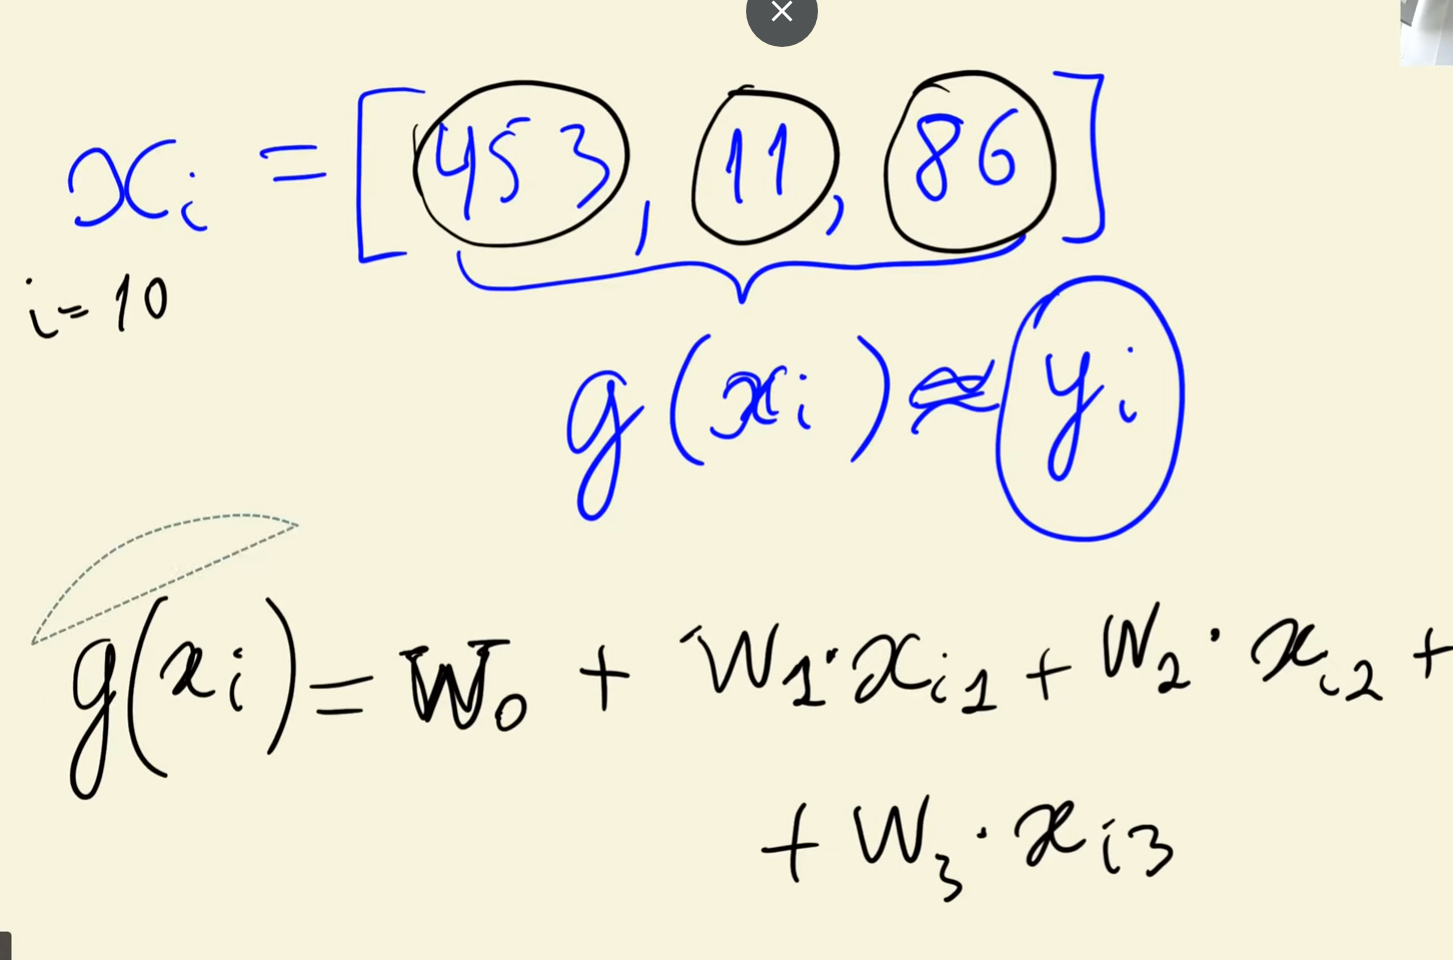

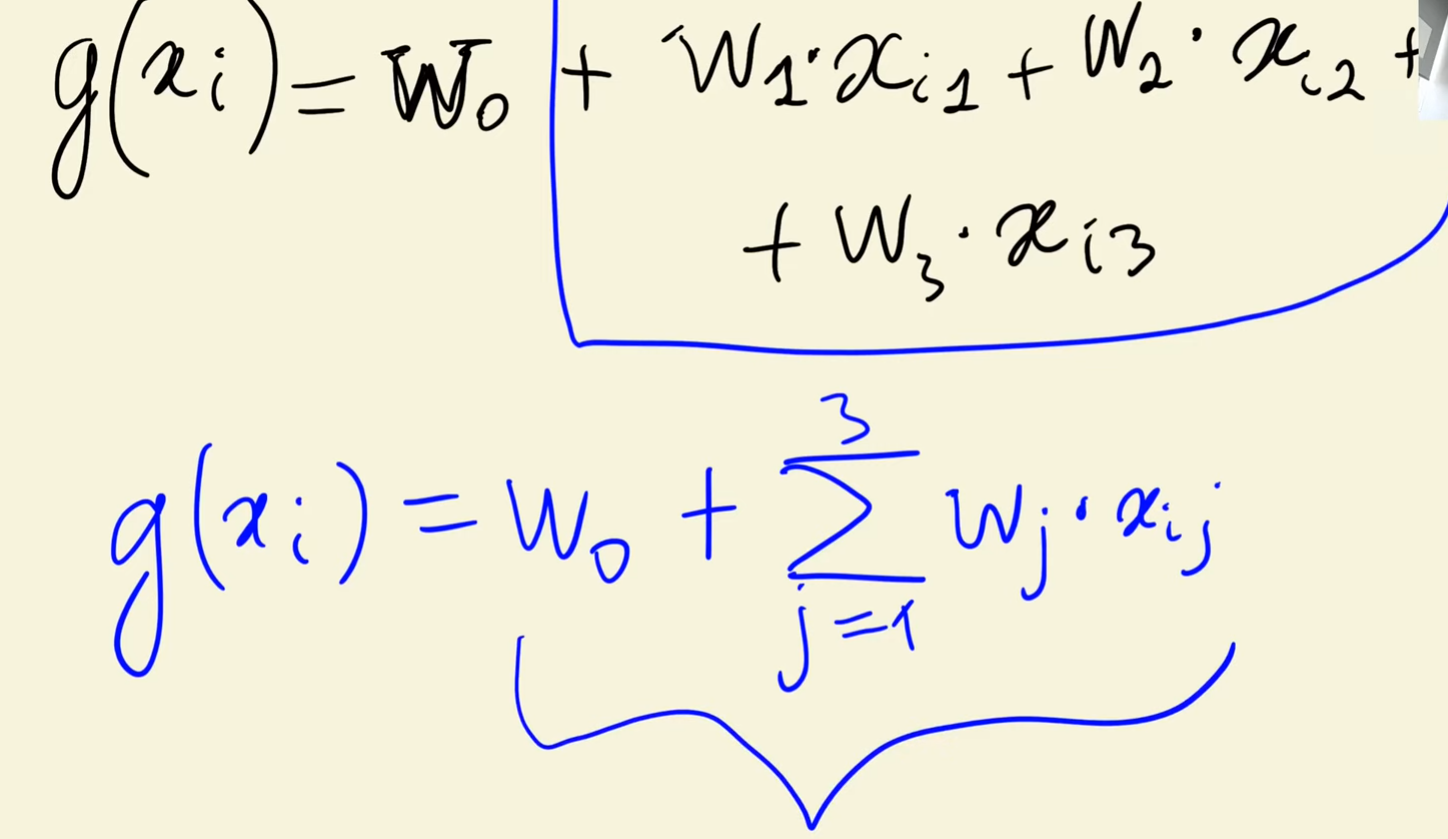

## 2.5 Linear regression vector form Implementation

Our weight(created randomly for this example)

In [40]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w 

Our features (created randomly for this example)

In [41]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86] 

In [42]:
X = [x1, x2, x3]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

Creating feature matrix

In [43]:
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

Linear regression model

In [44]:
def linear_regression(X):
    return X.dot(w_new)

Prediction

In [45]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.6 Training a linear regression model

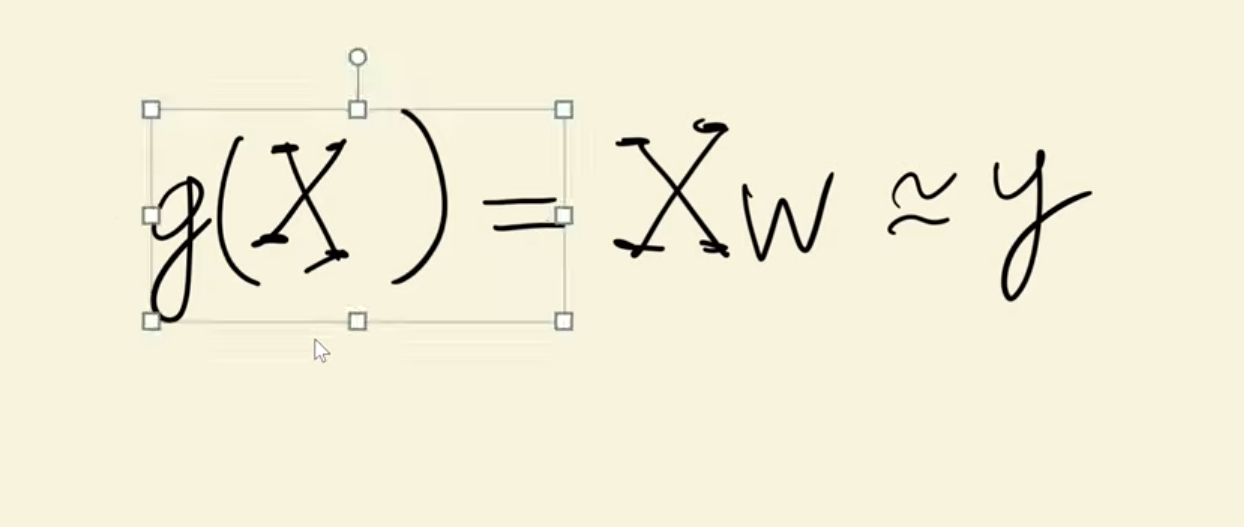

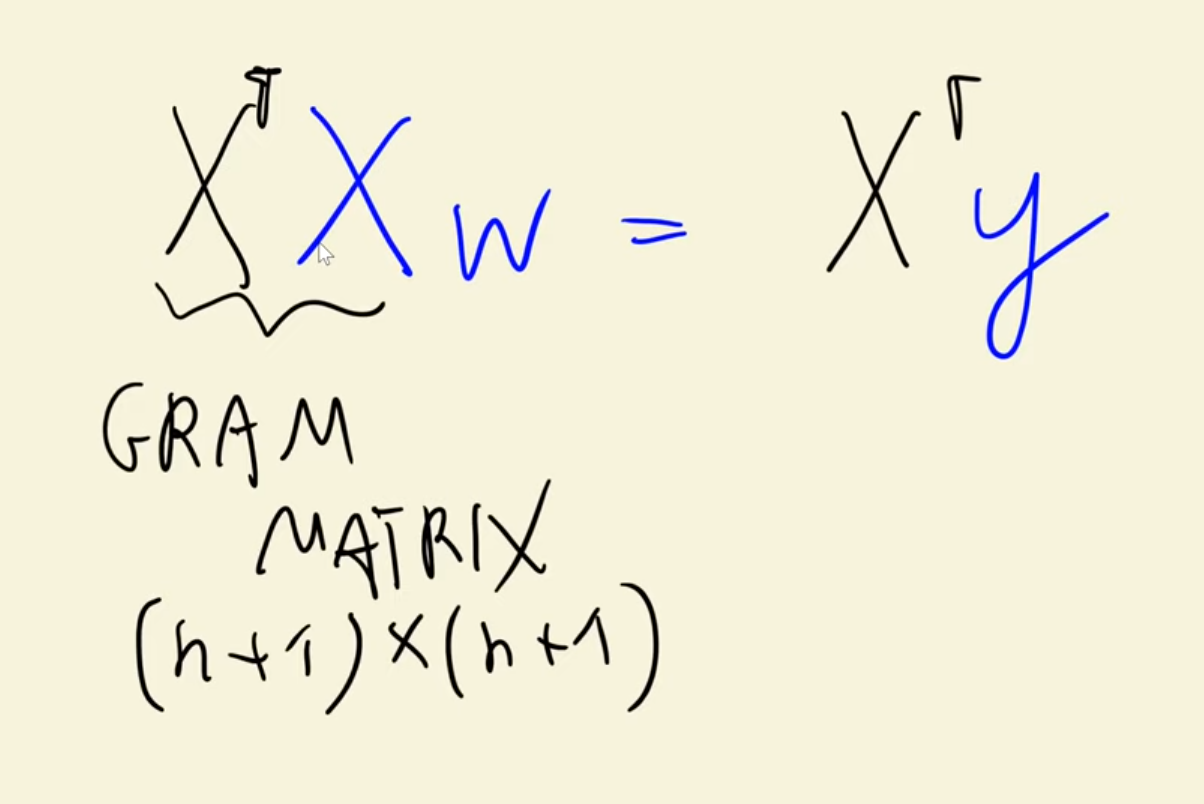

  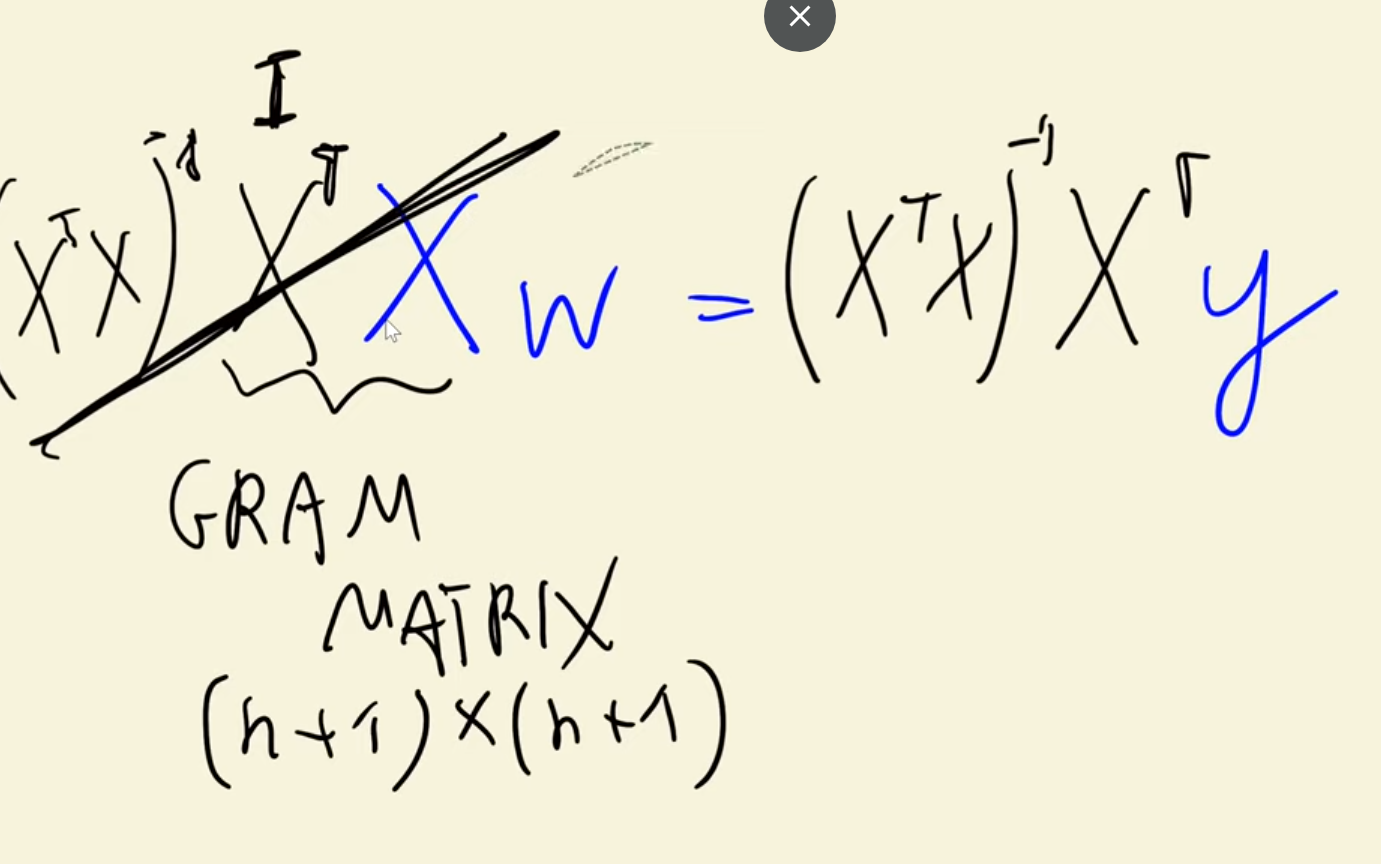

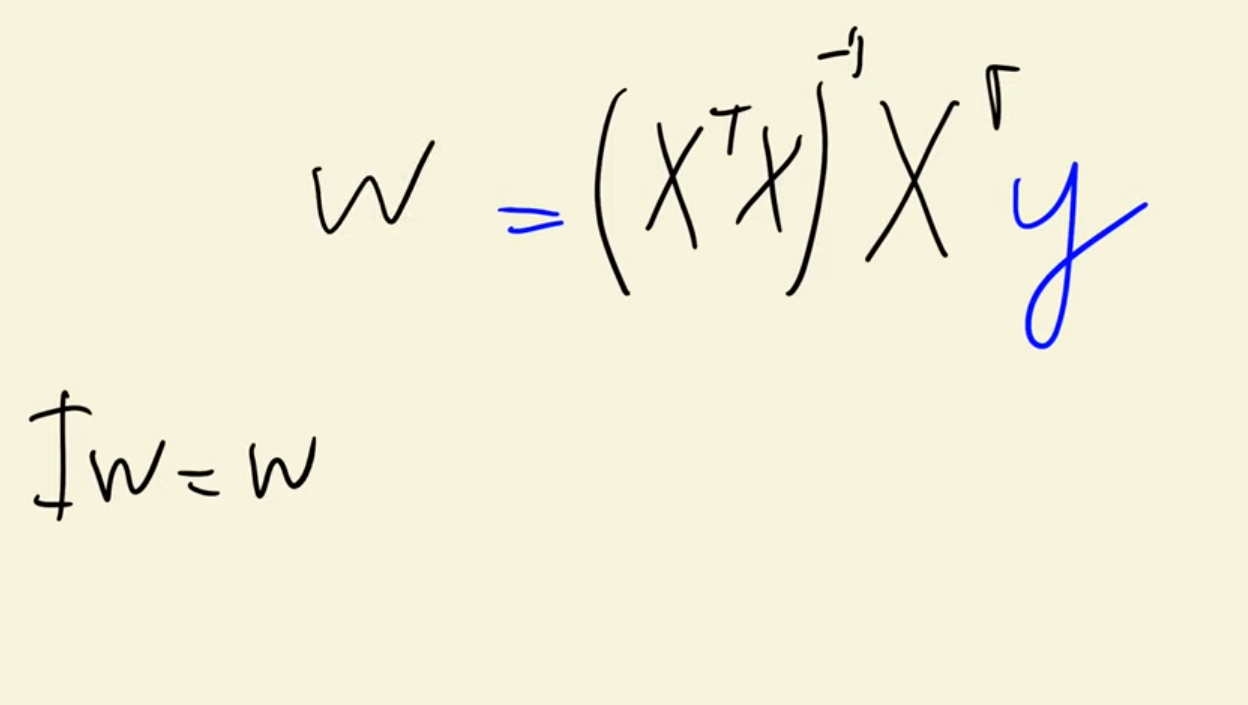

In [46]:
def train_linear_regression(X, y):
    pass

In [47]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

Creating a new matrix, because our previous X matrix not square matrix and this is a problem

In [49]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86], 
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86] 
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [60]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [62]:
X = np.column_stack([ones, X])

We have to implement this formula further

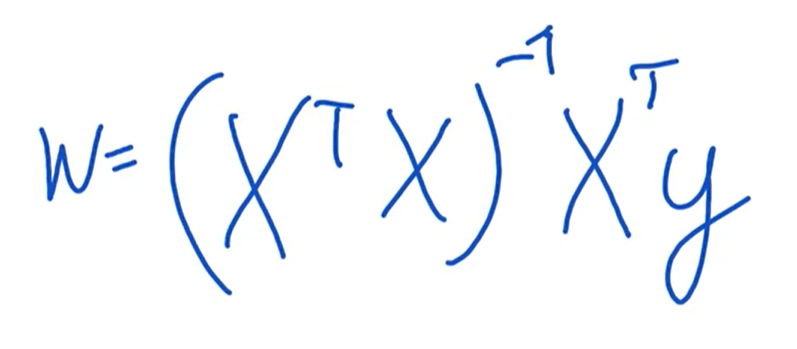

In [56]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

Gram Matrix

In [63]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

Inverse this Matrix

In [64]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

Check that we did it correctly. Multiply inverse and XTX MATRIX

In [65]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

Find a **w** value:

In [66]:
w_full = XTX_inv.dot(X.T).dot(y)

In [67]:
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

## Car price baseline model

In [4]:
df = pd.read_csv('C:/Users/Pizzu/ml_zoomcamp2023/ml_zoomcamp2023/2. Machine Learning for Regression/data.csv')

In [5]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# 2.1 Data preparation

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings: 
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# 2.2 Exploratory data analysis 

In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
for col in df.columns: 
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

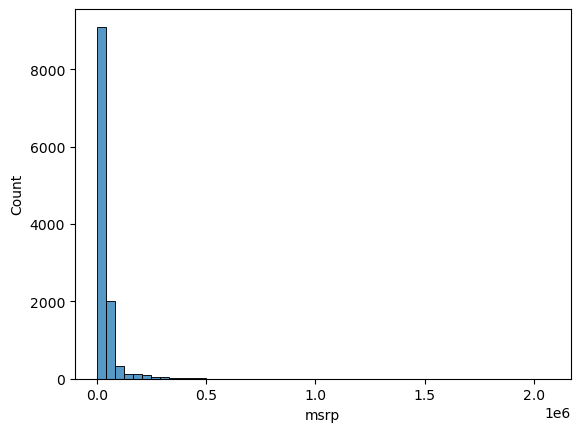

In [14]:
sns.histplot(df.msrp, bins=50)

### Let's zoom in it and use some filtres 

<AxesSubplot:xlabel='msrp', ylabel='Count'>

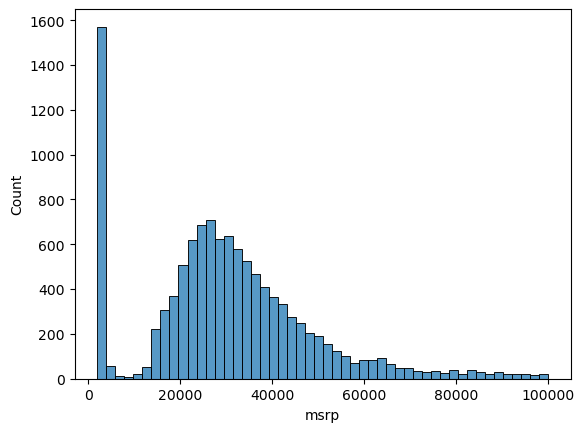

In [15]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [16]:
np.log1p([0, 10, 1000, 100000])

# np.log([0+1, 10+1, 1000+1, 100000+1])

array([ 0.        ,  2.39789527,  6.90875478, 11.51293546])

In [17]:
price_logs = np.log1p(df.msrp)

In [18]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

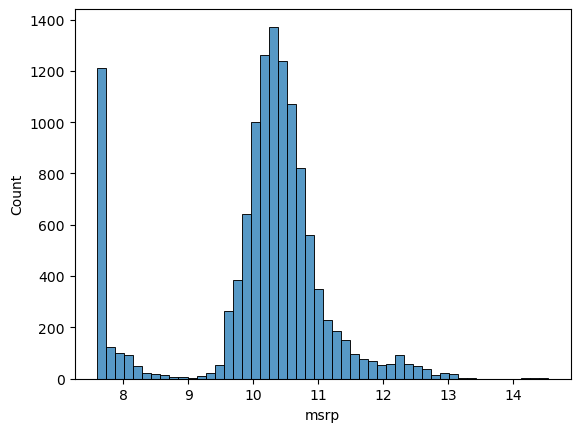

In [19]:
sns.histplot(price_logs, bins = 50)

Missing values

In [20]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.3 Setting up the validation framework

In [21]:
n = len(df)
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = n - n_val - n_test

In [22]:
n, n_val + n_test + n_train

(11914, 11914)

In [23]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [24]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val:] 

In [25]:
idx = np.arange(n)

In [26]:
np.random.seed(2)
np.random.shuffle(idx)

In [27]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]] 

In [28]:
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
2735    chevrolet   cobalt  2008          regular_unleaded      148.0   
6720       toyota   matrix  2012          regular_unleaded      132.0   
5878       subaru  impreza  2016          regular_unleaded      148.0   
11190  volkswagen  vanagon  1991          regular_unleaded       90.0   
4554         ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
2735                4.0            manual  front_wheel_drive              2.0   
6720                4.0         automatic  front_wheel_drive              4.0   
5878                4.0         automatic    all_wheel_drive              4.0   
11190               4.0            manual   rear_wheel_drive              3.0   
4554                8.0         automatic   four_wheel_drive              4.0   

      market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
2735              NaN      compact              coupe           33        24   
6720        hatchback      compact      4dr_hatchback           32        25   
5878        hatchback      compact      4dr_hatchback           37        28   
11190             NaN        large  passenger_minivan           18        16   
4554        flex_fuel        large    crew_cab_pickup           21        15   

       popularity   msrp  
2735         1385  14410  
6720         2031  19685  
5878          640  19795  
11190         873   2000  
4554         5657  56260

In [29]:
len(df_train),len(df_test), len(df_val)

(7150, 2382, 2382)

In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Set our y - value (target)

In [31]:
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [32]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

### Delete y (target) from out dataset

In [33]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [34]:
len(y_train)

7150

# 2.4 Linear regression

In [35]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [36]:
# let's take only 3 features: 'engine_fuel_type', 'city_mpg', 'popularity' and make a list

xi = [453, 11, 86]

### So in general we have to take our features x[] and predict our target - y (price). Our model formula in general looks like this:

In [37]:
g(xi) = W[0] + W[1]X[i1] + W[2]X[i2] + W[3]X[i3]

SyntaxError: cannot assign to function call (3501996699.py, line 1)

In [38]:
# it's our bias term 
w0 = 7.17

#let's set weights for our features
w = [0.01, 0.04, 0.002]

### Create simple linear regression function

In [39]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
        
    return pred

In [40]:
linear_regression(xi)

12.312

### We do '-1' to undo the '+1' we did inside log early (before)

In [41]:
np.expm1(12.312)

222347.2221101062

### Our prediction (y): 222347.2221101062

# 2.5 Linear regression vector form

In [42]:
def dot(xi, w): 
    n = len(xi)
    
    res = 0.0 # bias term
    
    for j in range(n):
        res = res +xi[j] * w[j]
        
    return res

In [43]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [44]:
w_new = [w0] + w 

# our bias term + our features
w_new

[7.17, 0.01, 0.04, 0.002]

In [45]:
def linear_regression(xi):
    xi = [1] +xi
    return dot(xi, w_new)

In [46]:
linear_regression(xi)

12.312

In [47]:
xi = [453, 11, 86]

# it's our bias term 
w0 = 7.17

#let's set weights for our features
w = [0.01, 0.04, 0.002]

In [48]:
# It's our specific observations (cars)

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# Let's put them into matrix 

X = [x1, x2, x10] # list of list 
X = np.array(X)


In [49]:
# It's our predictions for each cars

def linear_regression(X):
    return X.dot(w_new)

In [50]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# 2.6 Training Linear Regression: Normal Equation

In [51]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [52]:
# We have to add new columns in the begining. Let's do it

ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [53]:
# merge our ones to X

X = np.column_stack([ones, X])

In [54]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [55]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [56]:
w0 = w_full[0]
w = w_full[1:]

In [57]:
# Our weights. In that case we have negative values of weights

w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [58]:
# Let's make a function 

def train_linear_regression(X, y): 
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]    

In [59]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

# 2.7 Car price baseline model

In [63]:
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
0   chevrolet   cobalt  2008          regular_unleaded      148.0   
1      toyota   matrix  2012          regular_unleaded      132.0   
2      subaru  impreza  2016          regular_unleaded      148.0   
3  volkswagen  vanagon  1991          regular_unleaded       90.0   
4        ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0            manual  front_wheel_drive              2.0   
1               4.0         automatic  front_wheel_drive              4.0   
2               4.0         automatic    all_wheel_drive              4.0   
3               4.0            manual   rear_wheel_drive              3.0   
4               8.0         automatic   four_wheel_drive              4.0   

  market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
0             NaN      compact              coupe           33        24   
1       hatchback      compact      4dr_hatchback           32        25   
2       hatchback      compact      4dr_hatchback           37        28   
3             NaN        large  passenger_minivan           18        16   
4       flex_fuel        large    crew_cab_pickup           21        15   

   popularity  
0        1385  
1        2031  
2         640  
3         873  
4        5657

In [64]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [65]:
# create list of features

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

# create subset of columns 

df_train[base]

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0         148.0               4.0           33        24        1385
1         132.0               4.0           32        25        2031
2         148.0               4.0           37        28         640
3          90.0               4.0           18        16         873
4         385.0               8.0           21        15        5657
...         ...               ...          ...       ...         ...
7145      300.0               6.0           31        20        3916
7146      210.0               4.0           30        24         873
7147      285.0               6.0           22        17         549
7148      563.0              12.0           21        13          86
7149      200.0               4.0           31        22         873

[7150 rows x 5 columns]

In [66]:
# Set featues and target 

X_train = df_train[base].values
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [67]:
# Train a mode 

train_linear_regression (X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

#### We get nan because we have missing values in our dataset. Let's fix it

In [68]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [69]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

#### We replace our missing values with 0. It's not always the best practise, but it's easier way in our case make this assumption

In [70]:
# One more time set our features and target 

X_train = df_train[base].fillna(0).values
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [71]:
w0, w = train_linear_regression(X_train, y_train)

In [72]:
# Let's make predictions use our weights

y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

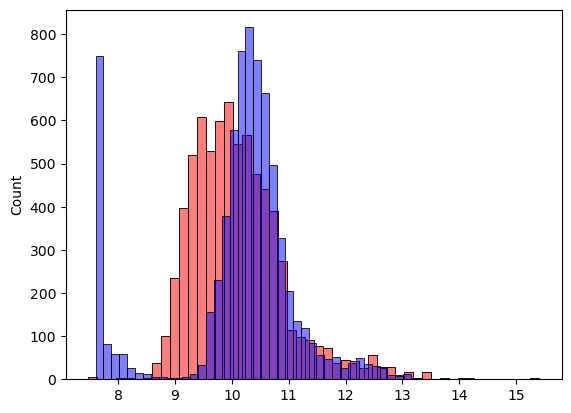

In [73]:
# Let's create histplot and see how our prediction deffirent from y_train

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# 2.8 RMSE - Root Mean Squared Error

In [74]:
 def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)

In [75]:
rmse(y_train, y_pred)

0.7554192603920132

# 2.9 Validating the model

In [76]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)


In [77]:
# Make a function which creating features 

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
# Training part

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

# 2.10 Simple feature engineering

Let's improve our model by adding new feature - 'Age' that is diff between today (max date from dataset) and car's year. Then check our result

In [79]:
df_train.year.max()

2017

Max date in dataset is 2017. So let's assume that today is 2017 

In [80]:
# let's calculate car's year

2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [81]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [82]:
# Training part

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

### Our result is better ! Model improved
### RMSE was 0.76, now - 0.51

<AxesSubplot:ylabel='Count'>

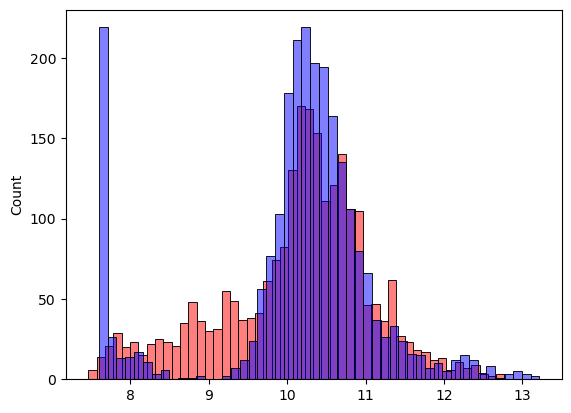

In [83]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# 2.11 Categorical variables

In [84]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

Despite the fact that values in column 'number_of_doors' look like numerical variables, in fact they are categorical variable. We have to create new column 'num_doors' with values '1' and '0' inside.

In [85]:
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [86]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [87]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [88]:
# Training part

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502352

Previous result - 0.5172055461058335

### Let's do the same for other categorical variables and look at result. For example take the 5 most popular car producer

In [89]:
df.make.value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

Create a list of indexes

In [90]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [91]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [92]:
# Training part

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557034

Previous result - 0.5157995641502352

### Let's do the same for other categorical variables in our dataset and look at result.

In [93]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [94]:
categorical_var = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [95]:
# this loop take top5 in each categorical_var and make a list, and then make a dict
categories = {}

for c in categorical_var:
    categories[c] = list(df[c].value_counts().head().index)

In [96]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [97]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [98]:
# Training part

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

30.49614122542036

### We tried to improve our model, but the result (RMSE) is significally worse. So let's find out what the problem.

# 2.12 Regularization

In [99]:
# Let's make a function 

def train_linear_regression_reg(X, y, r=0.001): 
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]    

In [100]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [101]:
# Training part

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45652199012699296

We get quite better result then we hava before our mistake, it was - 0.5076038849557034

# 2.13 Tuning the model

Let's use validation subset to find the best value

In [102]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # Validation part
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)
    

0.0 1.1755893098228356e+16 30.49614122542036
1e-05 9.603423230785483 0.45651701062736316
0.0001 6.323432447489521 0.45651706307917794
0.001 6.28552246198999 0.4565175086968008
0.1 6.1912086741971875 0.45656927630377264
1 5.634896667768018 0.4572204317997342
10 4.2839801089709955 0.4701456932098991


#### We see that r = 0.001 gives us the best rmse result. So let's train our model again.

In [103]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

# Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(score)

0.4565175086968008


# 2.14 Using the model

In [104]:
df_full_train = pd.concat([df_train, df_val])

In [105]:
df_full_train = df_full_train.reset_index(drop=True)

In [106]:
df_full_train

make                    model  year             engine_fuel_type  \
0      chevrolet                   cobalt  2008             regular_unleaded   
1         toyota                   matrix  2012             regular_unleaded   
2         subaru                  impreza  2016             regular_unleaded   
3     volkswagen                  vanagon  1991             regular_unleaded   
4           ford                    f-150  2017     flex-fuel_(unleaded/e85)   
...          ...                      ...   ...                          ...   
9527       volvo                      v60  2015             regular_unleaded   
9528    maserati  granturismo_convertible  2015  premium_unleaded_(required)   
9529    cadillac          escalade_hybrid  2013             regular_unleaded   
9530  mitsubishi                   lancer  2016             regular_unleaded   
9531         kia                  sorento  2015             regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
9527      240.0               4.0         automatic  front_wheel_drive   
9528      444.0               8.0         automatic   rear_wheel_drive   
9529      332.0               8.0         automatic   rear_wheel_drive   
9530      148.0               4.0            manual  front_wheel_drive   
9531      290.0               6.0         automatic  front_wheel_drive   

      number_of_doors                 market_category vehicle_size  \
0                 2.0                             NaN      compact   
1                 4.0                       hatchback      compact   
2                 4.0                       hatchback      compact   
3                 3.0                             NaN        large   
4                 4.0                       flex_fuel        large   
...               ...                             ...          ...   
9527              4.0                          luxury      midsize   
9528              2.0  exotic,luxury,high-performance      midsize   
9529              4.0                   luxury,hybrid        large   
9530              4.0                             NaN      compact   
9531              4.0                       crossover      midsize   

          vehicle_style  highway_mpg  city_mpg  popularity  num_doors_2  \
0                 coupe           33        24        1385          1.0   
1         4dr_hatchback           32        25        2031          0.0   
2         4dr_hatchback           37        28         640          0.0   
3     passenger_minivan           18        16         873          0.0   
4       crew_cab_pickup           21        15        5657          0.0   
...                 ...          ...       ...         ...          ...   
9527              wagon           37        25         870          NaN   
9528        convertible           20        13         238          NaN   
9529            4dr_suv           23        20        1624          NaN   
9530              sedan           34        24         436          NaN   
9531            4dr_suv           25        18        1720          NaN   

      num_doors_3  num_doors_4  
0             0.0          0.0  
1             0.0          1.0  
2             0.0          1.0  
3             1.0          0.0  
4             0.0          1.0  
...           ...          ...  
9527          NaN          NaN  
9528          NaN          NaN  
9529          NaN          NaN  
9530          NaN          NaN  
9531          NaN          NaN  

[9532 rows x 18 columns

Create feature matrix

In [107]:
X_full_train = prepare_X(df_full_train)

In [108]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

Set a target

In [109]:
y_full_train = np.concatenate([y_train, y_val])

In [110]:
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

Train a model

In [111]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [112]:
w

array([ 1.52506334e-03,  1.18188694e-01, -6.66105729e-03, -5.33414098e-03,
       -4.87603196e-05, -9.69091849e-02, -7.92623104e-01, -8.90864318e-01,
       -6.35103029e-01, -4.14339217e-02,  1.75560737e-01, -5.78066439e-04,
       -1.00563874e-01, -9.27549678e-02, -4.66859091e-01,  7.98659932e-02,
       -3.16047640e-01, -5.51981604e-01, -7.89525295e-02,  1.09523774e+00,
        9.19930195e-01,  1.14950759e+00,  2.65264366e+00,  5.09866762e-01,
        1.62934813e+00,  1.53005218e+00,  1.61723089e+00,  1.54523028e+00,
       -9.70559786e-02,  3.73062079e-02, -5.81767461e-02, -2.35940809e-02,
       -1.19357033e-02,  2.18895262e+00,  2.07458271e+00,  2.05916687e+00,
       -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
       -1.58817038e-01])

In [113]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.45177493046721484

### Let's use our model for predict car price. Actually that's why we started our work. 

For that purpose choose random car and used it's characteristics predict the price. 

In [114]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

In [115]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [116]:
df_small = pd.DataFrame([car])
df_small

make   model  year  engine_fuel_type  engine_hp  engine_cylinders  \
0  toyota  sienna  2015  regular_unleaded      266.0               6.0   

  transmission_type      driven_wheels  number_of_doors  market_category  \
0         automatic  front_wheel_drive              4.0              NaN   

  vehicle_size      vehicle_style  highway_mpg  city_mpg  popularity  
0        large  passenger_minivan           25        18        2031

In [117]:
X_small = prepare_X(df_small)

In [118]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.46265172180439

In [119]:
np.expm1(y_pred)

34983.19691540197

We got our prediction price< which based on our car's characteristics = 34983.19691540197

Actual price of our car is:

In [120]:
y_test[20]

10.463131911491967

In [121]:
np.expm1(y_test[20])

35000.00000000001

## Thus, actual price is - 35000.00000000001, prediction price is - 34983.19691540197. It looks like our model works quite well.